# **Modelo SEIR para COVID-19**
## A discrete stochastic model of the COVID-19 outbreak: Forecast and control  
### Sha He, Sanyi Tang , Libin Rong, Alison Hill


> Sara Acosta - Miguel Medina

> Seminario de Postgrado - Maestría de profundización en Estadística

> Facultad de Ciencias – Departamento de Estadística 

> Universidad Nacional de Colombia sede Bogotá
 

A continuación se hace una simulación  del modelo SEIR usado en el artículo *A discrete stochastic model of the COVID-19 outbreak: Forecast and control* para una población simulada de República Popular (de) China, esta simulación se basa en el modelo matemático de propagación de la enfermedad infecciosa COVID-19 propuesto por Alison Hill, en el cuál se incluyen diferentes trayectorias clínicas de infección e intervenciones para simular el progreso y reducción de la transmisión.
 
Este simulación propuesta tiene como único fin, la discusión academica producto de comparar el modelo propuesto por Sha He, Sanyi Tang , Libin Rong con una replica basada en el modelo planteado por Alison Hill para la pandemia del COVID-19.

# Introducción
## Modelo **SEIR**

Para nuestra modelización se usara una adaptación del  modelo SEIR (una adaptación del modelo SIR). En una población de tamaño fijo N en la que se ha desatado una epidemia que se propaga mediante contagio, en un tiempo t los individuos pueden estar en cuatro estados distintos:

* Susceptibles: S(t),

* Expuestos: E(t),

* Infectados: I(t),

* Recuperados: R(t).

El modelo SEIR se adapta  al comportamiento de la epidemia del coronavirus dado que, además de a los susceptibles de ser infectados, a los ya infectados y a los recuperados, conviene también tener en cuenta a los expuestos, esto es, individuos que portan la enfermedad pero que, al hallarse en su periodo de incubación, no muestran síntomas y aún no pueden infectar a otros (hay que ser precisos con lo que estamos denotando: si un individuo no presenta síntomas pero sí puede contagiar a otros lo contabilizamos en I(t), no en E(t)).

Información tomada del blog del instituto de matemáticas de la universidad de  *Sevilla [Link](https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/)*

Dado que no tomaremos el modelo SEIR básico con solo 4 estados, se parten de los siguientes estados y por lo tanto del siguiente modelo de ecuaciones diferenciales :
*   **S:** Individuos Suceptibles 
*  **E:** Individuos expuestos (Infectados pero sin presencia de sintomas )
*  **I:** Infectados (Que no requieren hospitalización) 
* **Q:** Personas en cuarentena.    
* **H:** Hospitalización (Infectados que requieren hospitalización.)
* **R:**  Recuperados
* **D:** Muertos.  

Por lo tanto vamos a tener que el número total de personas en nuestro modelo sera: 
* **N:** S + E + I + Q + H + R + D ; Que sera la suma de todas las personas en cada uno de los estados. 

$$ S = -\beta_1 IS - \beta_2 QS - \beta_3HS  \\   E = \beta_1 I S + \beta_2 QS + \beta_3 H S - \alpha E
\\ I = \alpha E -\gamma_1 I- p_1I  
\\ Q = p_1 I - \gamma_2 Q - p_2 Q
\\ H = p_2 Q - \gamma_3 H- \mu H
\\ R = \gamma_1 I + \gamma_2 Q + \gamma_3 H
\\ D = \mu H$$

In [53]:
#IMPORTAR LIBRERIAS.
import numpy as np, matplotlib.pyplot as plt     #Manejo de los datos.
from scipy.integrate import odeint                         #Solución de ecuaciones diferenciales. 

In [54]:
#Se definen las ecuaciones diferenciales dentro de una función
#  creamos primero un vector que contiene todos los estados de nuestro modelo por practicidad.

def seir(y,t,b,sigma,g,d,u,N): 
    dy=[0,0,0,0,0,0]
    S=N-sum(y);                                                          # SUCEPTIBLES
    dy[0]=np.dot(b[1:3],y[1:3])*S-sigma*y[0]          #  EXPUESTOS
    dy[1]= sigma*y[0]-(g[1]+d[1])*y[1]                      #  INFECTADOS
    dy[2]= d[1]*y[1] -(g[2]+d[2])*y[2]                       # CUARENTENA
    dy[3]= d[2]*y[2] -(g[3]+u)*y[3]                          # HOSPITALIZADOS
    dy[4]= np.dot(g[1:3],y[1:3])                                 # RECUPERADOS
    dy[5]=u*y[3]                                                          # MUERTOS

    return dy

Definición de parámetros
Se definen los parámetros basado en observaciones clinicas del primer bimestre del año 2020 de la población de la republica popular de China.

Los parámetros estimados son tomados del siguiente repositorio de datos.

Los parámetros importantes, para nuestro caso seran:

* β1:  Tasa de trasmisión de individuos infectados con sintomas.
* β2:  Tasa de transmisión de individuos que se encuentran en cuarentena.
* β3:  Tasa de transmisión de individuos que se encuentran hospitalizados.
* γ1:  Tasa de recuperación de infectados.
* γ2:  Tasa de recuperación de individuos en cuarentena.
* γ3:  Tasa de recuperación de individuos hospitalizados.
* σ:  Tasa de transmisión de individuos expuestos a la clase infectada; de forma que  1/σ  es el tiempo promedio de incubación
* δ1:  Tasa de transmisión de individuos infectados a la clase de individuos en cuarentena
* δ2:  Tasa de transimisión de individuos en cuarentena a individuos hospitalizados.
* δ3:  Tasa de transmisión de individuos hospitalizados a individuos en cuarentena.
* μ:  Tasa de mortalidad.

**Indicadores**


In [55]:
#Variables definidas en el repositorio

periodoincubacion     =   7           # Período de incubación, días
duracioninfeccion     =   14          # Duración de infeccion , días
FracInfectados        =  0.8          # Infectados
FracCuarentena        =  0.15         # Cuarentena
FracHospitalizacion   =  0.05         # Hospitalizados
CFR                   =  0.02         # Tasa de mortalidad 
TiempoHospital        =  7            # Tiempo desde el ingreso en la UCI hasta la muerte, días
DurHosp               =  15           # Duración de la hospitalización, días

In [56]:
N=1000
b=np.zeros(4)   #beta
g=np.zeros(4)   #gamma
d=np.zeros(3)   #delta

sigma=1/periodoincubacion

u=(1/TiempoHospital)*(CFR/FracHospitalizacion)
g[3]=(1/TiempoHospital)-u

d[2]=(1/DurHosp)*(FracHospitalizacion/(FracHospitalizacion+FracCuarentena))
g[2]=(1/DurHosp)-d[2]

g[1]=(1/duracioninfeccion)*FracInfectados
d[1]=(1/duracioninfeccion)-g[1]

b=2.5e-4*np.array([0,1,0,0])                        # los casos hospitalizados que no son infecciosos, se encuentra definidos previamente

print(sigma)   # Sigma
print(b)       # Beta
print(g)       # Gamma
print(d)       # Delta
print(u)       # Mu

0.14285714285714285
[0.      0.00025 0.      0.     ]
[0.         0.05714286 0.05       0.08571429]
[0.         0.01428571 0.01666667]
0.057142857142857134


**Tasa reproductiva**

En comparación con el número reproductivo básico, el número reproductivo efectivo se puede utilizar para
medir el número de casos secundarios generados por un caso primario en una población en la que hay una infeccion.
* Para este caso va a estar dada por:

In [57]:
R0=N*((b[1]/(d[1]+g[1]))+(d[1]/(d[1]+g[1]))*(b[2]/(d[2]+g[2])+ (d[2]/(d[2]+g[2]))*(b[3]/(u+g[3]))))
print("R0 = {0:4.1f}".format(R0))

R0 =  3.5


# Estimación del Modelo
* **Estimación del Modelo y visualización**
* **Visualización**

In [59]:
### Tiempos a modelar ---> 6 meses y un año
tmax_6meses=120                         
tmax=365

tvec_6meses=np.arange(0,tmax_6meses,0.1)
tvec=np.arange(0,tmax,0.1)
ic=np.zeros(6)
ic[0]=1

(1, 1000)

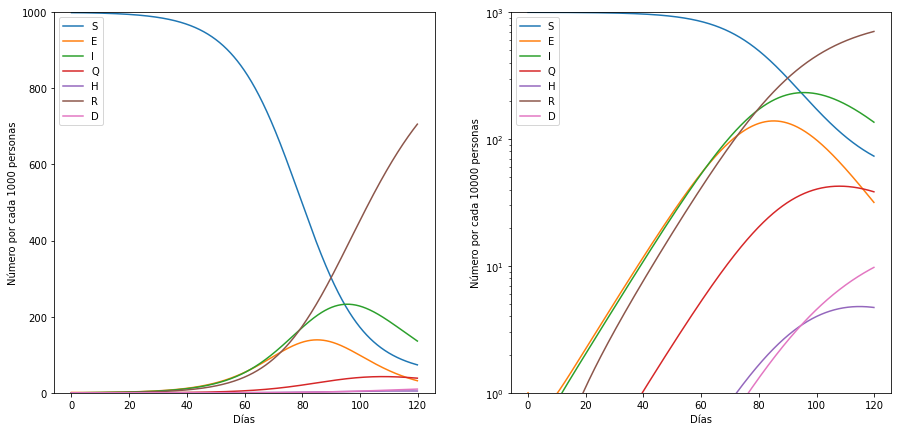

In [60]:
################################################ PARA SEIS MESES #######################################3
soln=odeint(seir,ic,tvec_6meses,args=(b,sigma,g,d,u,N))
soln=np.hstack((N-np.sum(soln,axis=1,keepdims=True),soln))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(tvec_6meses,soln)
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([0,1000])


plt.subplot(1,2,2)
plt.plot(tvec_6meses,soln)
plt.semilogy()
plt.xlabel("Días")
plt.ylabel("Número por cada 10000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([1,1000])

(1, 1000)

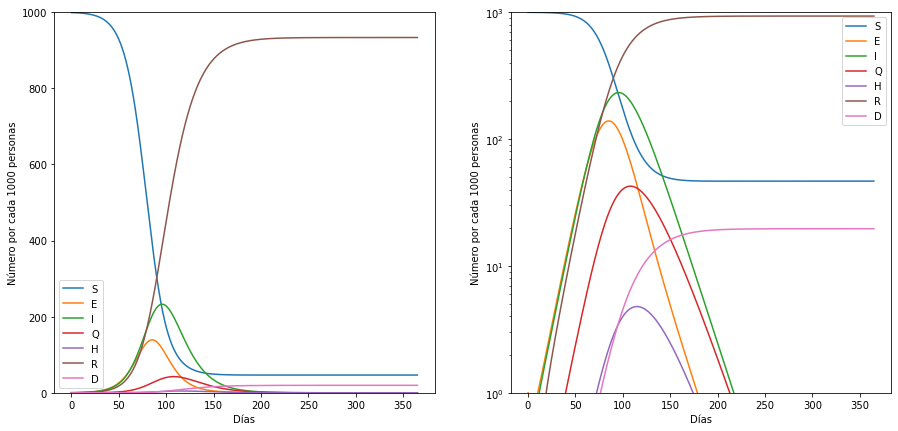

In [61]:
##################################################### PARA UN AÑO  #############################################

soln=odeint(seir,ic,tvec,args=(b,sigma,g,d,u,N))
soln=np.hstack((N-np.sum(soln,axis=1,keepdims=True),soln))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(tvec,soln)
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([0,1000])


plt.subplot(1,2,2)
plt.plot(tvec,soln)
plt.semilogy()
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([1,1000])

* Todas las clases  eventualmente crecen al mismo ritmo durante la infección temprana

* Se espera que el número de personas suceptibles a infectarse disminuya a lo largo del timpo mientras que el número de recuperados aumente. 

* Se observa que el pico de infectados al igual que el pico de expuestos llega aproximadamente en el día 100
* Ademas , el pico de muertos por día se alcanza el día llega aproximadamente el dia 150 sin embargo se mantiene constante.

* Según datos de China, alrededor del 5% de las personas que dieron positivo por COVID-19 para inicicios de 2020 experimentan síntomas graves y requieren ingreso a hospitales. En estas condiciones, según el modelo el sistema de salud estaría completamente abrumado, con tasas de mortalidad muy altas y una incapacidad para brindar cuidados intensivos. Una estrategia de “mitigación” parcial que implique distanciamiento social (aislamiento domiciliario de casos sospechosos y distanciamiento social de ancianos) no sería suficiente, y se requiere un bloqueo severo para hacer posible disminuir R0

**Tasa de crecimiento y tiempo de duplicación de infectados** 




In [62]:
# Definir la tasa de crecimiento de la infeccion 
def tasa_crecimiento(tvec,soln,t1,t2,i):
  i1=np.where(tvec==t1)[0][0]
  i2=np.where(tvec==t2)[0][0]
  r=(np.log(soln[i2,1])-np.log(soln[i1,1]))/(t2-t1)
  Duplicacion=np.log(2)/r

  return r, Duplicacion 

In [63]:
(r,Duplicacion)=tasa_crecimiento(tvec,soln,10,20,1)
print("La tasa de crecimiento epidémico es = {0:4.2f} por día y el tiempo de duplicación{1:4.1f} días ".format(r,Duplicacion))


La tasa de crecimiento epidémico es = 0.08 por día y el tiempo de duplicación 8.5 días 


## Modelo con Intervención por medidas de distanciamiento Social
**Modelo con Medida de distanciamiento Social**

A continuación se repite el modelo con una medida de distanciamiento social que reduzca la tasa de transmisión

Daado que estas son estimaciones, es imposible conocer el futuro, pero sí se puede analizar cómo las medidas afectan a la evolución de la epidemia; en particular, ver los cambios si se  aplicaran medidas de contención  o si estas medidas se comenzaran a aplicar en un día determinado.

* Recordemos  aquí que $\beta$ es la probabilidad de transmisión multiplicada por el número de contactos por unidad de tiempo. Básicamente, con una reducción en $\beta$ y por lo tanto en $R_0$, el pico disminuye en intensidad 
*   Medida de distanciamiento: Supuesto de aforo al 60% que afecta el párametro $\beta$ y la tasa de crecimiento epidémico



In [64]:
#### Para ver ese efecto se realiza un cambio en el beta.
bdis=0.6*b
R0_dis=N*((bdis[1]/(d[1]+g[1]))+(d[1]/(d[1]+g[1]))*(bdis[2]/(d[2]+g[2])+ (d[2]/(d[2]+g[2]))*(bdis[3]/(u+g[3]))))


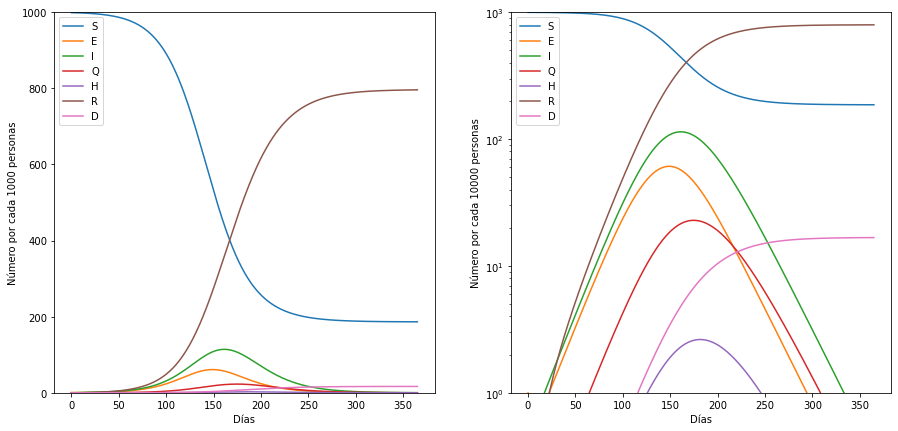

R0 bajo intervención =  2.1
La tasa de crecimiento epidémico es = 0.04 por día y el tiempo de duplicación 16.1 días 


In [65]:
solndis=odeint(seir,ic,tvec,args=(bdis,sigma,g,d,u,N))
solndis=np.hstack((N-np.sum(solndis,axis=1,keepdims=True),solndis))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(tvec,solndis)
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([0,1000])


plt.subplot(1,2,2)
plt.plot(tvec,solndis)
plt.semilogy()
plt.xlabel("Días")
plt.ylabel("Número por cada 10000 personas")
plt.legend(("S","E","I","Q","H","R","D"))
plt.ylim([1,1000])

(rdis,duplicaciondis)=tasa_crecimiento(tvec,solndis,30,40,1)

plt.show()
print("R0 bajo intervención = {0:4.1f}".format(R0_dis))
print("La tasa de crecimiento epidémico es = {0:4.2f} por día y el tiempo de duplicación {1:4.1f} días ".format(rdis,duplicaciondis))


**Modelo con Medida de distanciamiento Social**
*  Está claro que las medidas de contención son realmente efectivas, permiten suavizar los «picos» y que lo alejan en el tiempo, pasan del día 100 al día 150 aproximadamente.
* También, que el efecto de las medidas no es inmediato, sino que tarda días en ponerse de manifiesto. 

**Comparación del crecimiento epidémico con y sin intervención**

Text(0.5, 1.0, 'Total de Casos Infectados')

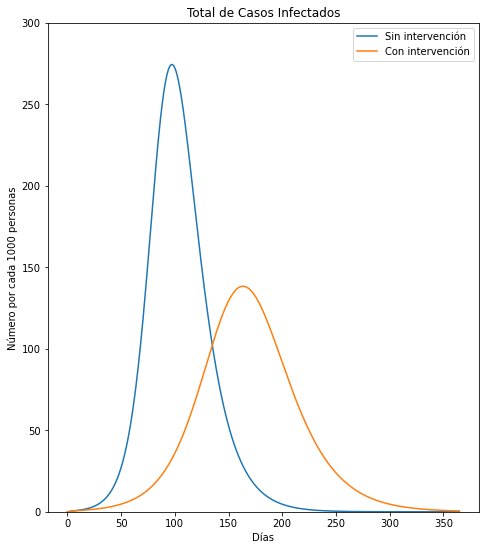

In [66]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(tvec,np.sum(soln[:,2:5],axis=1,keepdims=True))
plt.plot(tvec,np.sum(solndis[:,2:5],axis=1,keepdims=True))
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Sin intervención","Con intervención"))
plt.ylim([0,300])
plt.title('Total de Casos Infectados')

* Por lo tanto se evidencia que efectivamente tomando medidades de distanciamiento y aislamiento social el pico  de infectados disminuye.
* También se observa que ademas de que el pico disminuye su periodo de ocurrencia va a ser mas tardio.


**Casos de COVID19  vs  Capacidad hopitalaria** 

Dependiendo de la etapa de gravedad de la infección por COVID-19, los pacientes necesitan un nivel diferente de atención médica.

Las personas en $ I$ tienen una infección "leve", lo que significa que tienen tos, fiebre y otros síntomas similares a los de la gripe y también pueden tener neumonía leve. La neumonía leve no requiere hospitalización, aunque en muchos lugares donde brotaron brotes, como China y Corea del Sur, todos los pacientes sintomáticos están siendo hospitalizados. Es probable que esto reduzca la propagación y controle a estos pacientes en caso de que progresen rápidamente a un peor resultado. Sin embargo, es una gran carga para el sistema de salud.

Las personas en $ H$ tienen una infección "grave", que se clasifica médicamente en cualquiera de los siguientes: "disnea, frecuencia respiratoria 30 / min, saturación de oxígeno en sangre, dificultades  pulmonares, etc.. Estas personas requieren hospitalización.

Consideramos diferentes escenarios para los requisitos de atención. Una variación entre los escenarios es si incluimos la hospitalización para todos los individuos o solo para aquellos con infección grave. 

* Si las UCI están llenas, los hospitales tienen protocolos desarrollados para la influenza pandémica a fin de proporcionar ventilación mecánica fuera de las instalaciones regulares de la UCI y los requisitos de personal. En comparación con los protocolos de ventilación "convencionales", existen protocolos de "contingencia" y "crisis" que pueden adoptarse para aumentar la carga de pacientes. Estos protocolos implican un aumento de la proporción de pacientes: personal, el uso de camas fuera de la UCI y la participación de especialistas en cuidados no críticos en la atención del paciente.



**Nuevos parámetros asumiendo estas medidas:** [link](https://docs.google.com/spreadsheets/d/1zZKKnZ47lqfmUGYDQuWNnzKnh-IDMy15LBaRmrBcjqE)

* Solo los casos graves van al hospital
* Casos críticos requieren cuidados de la UCI y ventilación mecánica.

In [68]:
CamashabHosp=2.6*(1-0.66*1.1)          #Camas de hospital disponibles por 1000 personas 
CamasUCIhabil=0.26*(1-0.68*1.07)       #Camas de UCI disponibles por 1000 personas.
ConvVentCap=0.062                      #Exceso estimado de pacientes que podrían ser ventilado por cada 1000 personas  utilizando protocolos convencionales
ContVentCap=0.15                       #Exceso estimado de pacientes que serían ventilados por cada 1000 personas  utilizando protocolos de contingencia
CrisisVentCap=0.42                     #Exceso estimado de pacientes que serían ventilados por cada 1000 personas utilizando protocolos de crisis

Text(0.5, 1.0, ' Con Intervención')

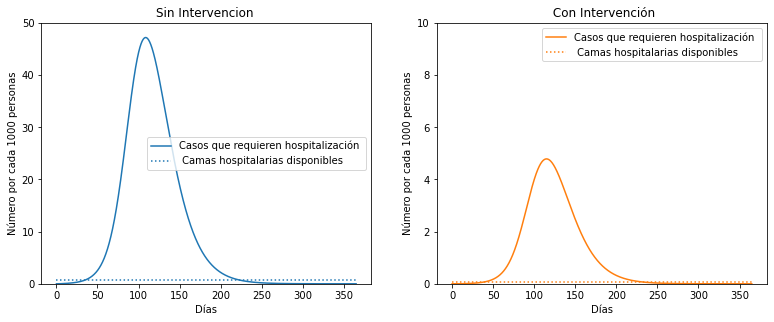

In [69]:
NumHosp=soln[:,3]+soln[:,4]
NumUCI=soln[:,4]

plt.figure(figsize=(13,4.8))
plt.subplot(1,2,1)
plt.plot(tvec,NumHosp)
plt.plot(np.array((0, tmax)),CamashabHosp*np.ones(2),color='C0',linestyle=":")
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que requieren hospitalización "," Camas hospitalarias disponibles "))
ipeakHosp=np.argmax(NumHosp) #find peak
peakHosp=10*np.ceil(NumHosp[ipeakHosp]/10)#find time at peak
plt.ylim([0,peakHosp])
plt.title('Sin Intervencion ')


plt.subplot(1,2,2)
plt.plot(tvec,NumUCI,color='C1')
plt.plot(np.array((0, tmax)),CamasUCIhabil*np.ones(2),color='C1',linestyle=":")
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que requieren hospitalización "," Camas hospitalarias disponibles "))
ipeakICU=np.argmax(NumUCI) #find peak
peakICU=10*np.ceil(NumUCI[ipeakICU]/10)#find time at peak
plt.ylim([0,peakICU])
plt.ylim([0,10])
plt.title(' Con Intervención')

In [70]:
#Encontrar el momento en el que casos hospitalizados = capacidad
icross=np.argmin(np.abs(NumHosp[0:ipeakHosp]-CamashabHosp)) 
TimeFillBeds=tvec[icross]

#Encuentre el momento en que los casos de la UCI = capacidad
icross=np.argmin(np.abs(NumUCI[0:ipeakICU]-CamasUCIhabil)) 
TimeFillICU=tvec[icross]

plt.show()
print("Las camas del hospital y la UCI son ocupadas por pacientes COVID19 después {0:4.1f} y {1:4.1f} dias".format(TimeFillBeds,TimeFillICU))

Las camas del hospital y la UCI son ocupadas por pacientes COVID19 después 34.8 y 39.3 dias


* En este caso no hemos tenido en cuenta la capacidad limitada en el modelo en sí, es decir si los hospitales están al máximo de su capacidad, la tasa de mortalidad aumentará, ya que las personas con infecciones graves y críticas a menudo mueren sin atención médica. La tasa de transmisión probablemente también aumentará, ya que cualquier atención domiciliaria informal para estos pacientes probablemente no incluirá el nivel de aislamiento o precauciones que se utilizaríasn en un hospital.

## Solución 
* Permitir la ventilación mecánica fuera de las UCI utilizando la capacidad de contingencia.

(0.0, 10.0)

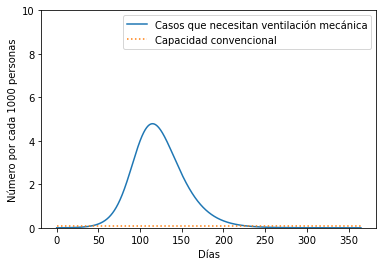

In [71]:
plt.plot(tvec,NumUCI)
plt.xlabel("Días")
plt.plot(np.array((0, tmax)),ConvVentCap*np.ones(2),linestyle=":")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que necesitan ventilación mecánica","Capacidad convencional","Capacidad de contingencia","Capacidad de crisis"))
plt.ylim([0,peakICU])
plt.ylim([0,10])

In [72]:
#Encontrar el momento en que los casos de la UCI = capacidad convencional
icrossConv=np.argmin(np.abs(NumUCI[0:ipeakICU]-ConvVentCap))
TimeConvCap=tvec[icrossConv]
icrossCont=np.argmin(np.abs(NumUCI[0:ipeakICU]-ContVentCap))
TimeContCap=tvec[icrossCont]
icrossCrisis=np.argmin(np.abs(NumUCI[0:ipeakICU]-CrisisVentCap))
TimeCrisisCap=tvec[icrossCrisis]

plt.show()
print("Los pacientes con COVID19 llenan la capacidad de ventilación mecánica después{0:4.1f} (Convencional), {1:4.1f} (Contigencia) and {2:4.1f} (creisis) dias:".format(TimeConvCap,TimeContCap,TimeCrisisCap))

Los pacientes con COVID19 llenan la capacidad de ventilación mecánica después37.7 (Convencional), 48.1 (Contigencia) and 60.8 (creisis) dias:


**Comparación de los casos con intervención**

(0.0, 10.0)

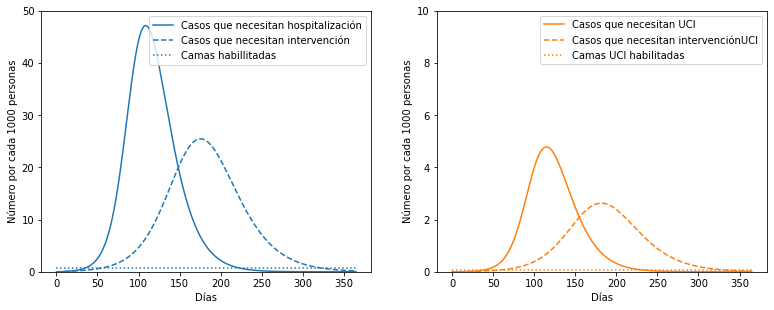

In [73]:
NumHosp1=solndis[:,3]+solndis[:,4]
NumUCI1=solndis[:,4]

plt.figure(figsize=(13,4.8))
plt.subplot(1,2,1)
plt.plot(tvec,NumHosp)
plt.plot(tvec,NumHosp1,color='C0',linestyle="--")
plt.plot(np.array((0, tmax)),CamashabHosp*np.ones(2),color='C0',linestyle=":")
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que necesitan hospitalización","Casos que necesitan intervención ","Camas habillitadas"))
plt.ylim([0,peakHosp])

plt.subplot(1,2,2)
plt.plot(tvec,NumUCI,color='C1')
plt.plot(tvec,NumUCI1,color='C1',linestyle="--")
plt.plot(np.array((0, tmax)),CamasUCIhabil*np.ones(2),color='C1',linestyle=":")
plt.xlabel("Días")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que necesitan UCI","Casos que necesitan intervenciónUCI","Camas UCI habilitadas "))
plt.ylim([0,peakICU])

In [74]:
#Encontramos  el momento en el que casos hospitalizados = capacidad
ipeakHospSlow=np.argmax(NumHosp1) #find peak
icross=np.argmin(np.abs(NumHosp1[0:ipeakHospSlow]-CamashabHosp)) 
TimeFillBedsSlow=tvec[icross]

#Encontramos el momento en que los casos de la UCI = capacidad
ipeakICUSlow=np.argmax(NumUCI1) #find peak
icross=np.argmin(np.abs(NumUCI1[0:ipeakICU]-CamasUCIhabil))
TimeFillICUSlow=tvec[icross]

plt.show()
print("Con la intervención, los pacientes con COVID19 llenan las camas del hospital y la UCI después de{0:4.1f} y  {1:4.1f} dias".format(TimeFillBedsSlow,TimeFillICUSlow))

Con la intervención, los pacientes con COVID19 llenan las camas del hospital y la UCI después de54.7 y  59.1 dias


Por ultimo, si tenemos  una mayor capacidad de ventilación mecánica, entonces:

(0.0, 10.0)

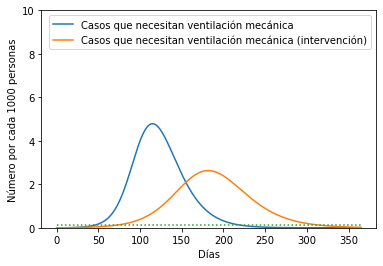

In [75]:
plt.plot(tvec,NumUCI)
plt.plot(tvec,NumUCI1)
plt.xlabel("Días")
plt.plot(np.array((0, tmax)),ContVentCap*np.ones(2),linestyle=":")
plt.ylabel("Número por cada 1000 personas")
plt.legend(("Casos que necesitan ventilación mecánica","Casos que necesitan ventilación mecánica (intervención)"))
plt.ylim([0,peakICU])

In [76]:
#Encontrar el momento en que los casos de la UCI = capacidad convencional (con intervención)
icrossConvSlow=np.argmin(np.abs(NumUCI1[0:ipeakICUSlow]-ConvVentCap))
TimeConvCapSlow=tvec[icrossConvSlow]
icrossContSlow=np.argmin(np.abs(NumUCI1[0:ipeakICUSlow]-ContVentCap))
TimeContCapSlow=tvec[icrossContSlow]
icrossCrisisSlow=np.argmin(np.abs(NumUCI1[0:ipeakICUSlow]-CrisisVentCap)) 
TimeCrisisCapSlow=tvec[icrossCrisisSlow]

plt.show()
print("Los pacientes con COVID19 llenan la capacidad de ventilación mecánica después {0:4.1f} (Crisis), {1:4.1f} (Contingencia) and {2:4.1f} (Intervención) dias".format(TimeConvCapSlow,TimeContCapSlow,TimeCrisisCapSlow))

Los pacientes con COVID19 llenan la capacidad de ventilación mecánica después 56.1 (Crisis), 76.7 (Contingencia) and 101.9 (Intervención) dias


# Conclusiones
*   Para la pandemia COVID-19, se construy ́o un modelo de comportamiento estocastico en tiempo discreto para estudiar el brote de la enfermedad, en donde se asume que la tasa de contacto entre los individuos susceptibles de infectarse disminuye exponencialmente desde que el gobierno ha implementado estrictas medidas de control.
*   La simulación muestra que la tasa de contacto es un factor clave en el control del brote de COVID-19.
*   Se evidencia que efectivamente tomando medidades de distanciamiento y aislamiento social el pico de infectados disminuye y por lo tanto el periodo de ocurrencia va a ser mas tardio.
* Se podrian simular situaciones diferentes al distanciamiento social tales como 
* La construcción de este tipo de modelos durante la ocurrencia de una pandemia de esta magnitud se hace necesario, dado que ayuda a los Gobiernos en la planeación y construcción de intervenciones de forma anticipada. 
* Los modelos epidemiológicos SEIR son una opción tradicional y sencilla que a través de un sistema de ecuaciones y la suposición  predice la ocurrencia de casos de una enfermedad infecciosa, proporcionando datos a largo plazo sobre el comportamiento de la prevalencia e incidencia. Permiten, además, considerar la dinámica de la epidemia a través de los diferentes estados en los que se pueden mover los individuos.

* Dificultad, estos modelos, aunque son muy utilizados, presentan varias limitaciones. 

# Bibliografía
*   He, Sha; Tang, Sanyi; Rong, Libin (2020). ”A discrete stochastic model of the COVID-19 outbreak: Forecast and control”. Mathematical Biosciences and Engineering, 17 (4): 2792-2804.
*   Correa, Juan; Barrera, Carlos (2018). ”Introducción a la Estadística Bayesiana”. Colombia: Instituto Tecnológico Metropolitano.
*   Lekone, Phenyo E; Finkenstädt, Bärbel F (2006). ”Statistical Inference in a Stochastic Epidemic SEIR Model with Control Intervention: Ebola as a Case Study”. Biometrics 62: 1170-1077.
*   Alison Hill, "SEIR_COVID19"(2020). Mathematical modeling of infectious disease spread within and between individuals, including HIV, drug resistant infection.
